In [1]:
from mumax5.engine import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
@np.vectorize
def expectation_mz_langevin(msat, bext, temperature, cellvolume):
    kB = 1.381e-23
    xi = msat*cellvolume*bext/(kB*temperature)
    return 1/np.tanh(xi) - 1/xi

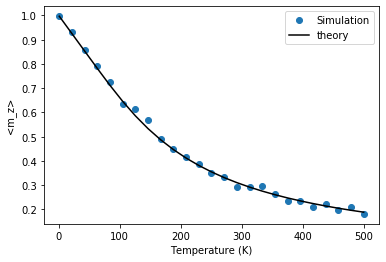

In [6]:
msat = 800e3
bext = 0.05
cellvolume = 100e-27
temperatures = np.linspace(1, 500, 25)

N = 1024
relaxtime = 1e-9
sampletime = 1e-9
nsamples = 200

world = World(cellsize=3*[np.power(cellvolume, 1./3.)])
world.bias_magnetic_field = (0, 0, bext)
magnet = world.add_ferromagnet(Grid((N, 1, 1)))
magnet.enable_demag = False
magnet.aex = 0.0
magnet.alpha = 0.1
magnet.msat = msat
magnet.magnetization = (0,0,1) # groundstate

solver = TimeSolver(magnet.magnetization,magnet.torque, magnet.thermal_noise)

@np.vectorize
def expectation_mz_simul(temperature):
    magnet.temperature = temperature
    solver.run(relaxtime)
    table = Table()
    table.add("mz", magnet.magnetization, 2)
    timepoints = np.linspace(solver.time, solver.time+sampletime, nsamples)
    solver.solve(timepoints, table)
    return np.average(table['mz'])

m_simul = expectation_mz_simul(temperatures)
m_langevin = expectation_mz_langevin(msat, bext, temperatures, cellvolume)

plt.plot(temperatures, m_simul, 'o', label="Simulation")
plt.plot(temperatures, m_langevin, 'k-', label="theory")
plt.xlabel("Temperature (K)")
plt.ylabel("<m_z>")
plt.legend()
plt.show()

In [ ]:
msat = 800e3
bext = np.linspace(0.2,0.05,10)
cellvolume = 100e-27
temperature = 200

N = 1024
relaxtime = 1e-9
sampletime = 1e-9
nsamples = 200

world = World(cellsize=3*[np.power(cellvolume, 1./3.)])

magnet = world.add_ferromagnet(Grid((N, 1, 1)))
magnet.enable_demag = False
magnet.aex = 0.0
magnet.alpha = 0.1
magnet.msat = msat
magnet.temperature = temperature
magnet.magnetization = (0,0,1) # groundstate

solver = TimeSolver(magnet.magnetization,magnet.torque, magnet.thermal_noise)

@np.vectorize
def expectation_mz_simul(bext):
    world.bias_magnetic_field = (0, 0, bext)
    solver.run(relaxtime)
    table = Table()
    table.add("mz", magnet.magnetization, 2)
    timepoints = np.linspace(solver.time, solver.time+sampletime, nsamples)
    solver.solve(timepoints, table)
    return np.average(table['mz'])

m_simul = expectation_mz_simul(temperatures)
m_langevin = expectation_mz_langevin(msat, bext, temperatures, cellvolume)

plt.plot(bext, m_simul, 'o', label="Simulation")
plt.plot(bext, m_langevin, 'k-', label="theory")
plt.xlabel("Temperature (K)")
plt.ylabel("<m_z>")
plt.legend()
plt.show()